In [ ]:
!pip install opencv-python dlib face_recognition torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'


Looking in indexes: https://download.pytorch.org/whl/cpu
ERROR: Could not find a version that satisfies the requirement face_recognition (from versions: none)
ERROR: No matching distribution found for face_recognition
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ke9_3cth
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ke9_3cth
  Resolved https://github.com/facebookresearch/detectron2.git to commit a9c0821a12ad353fb2a96f019515990d5460c5ac
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.8 MB/s eta 0:00:00
  Created wheel for detectron2: filename=de

Saving several_objects.jpg to several_objects.jpg


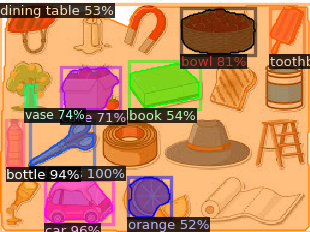

In [10]:
# --- Upload image ---
from google.colab import files
uploaded = files.upload()  # e.g. choose "street.jpg"

# --- Import & setup ---
import os, cv2, torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["DETECTRON2_DEVICE"] = "cpu"

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

# --- Load the uploaded image ---
img = cv2.imread("several_objects.jpg")  # update if different name
if img is None:
    raise ValueError("❌ Image not found. Check your filename!")

# --- Run detection ---
outputs = predictor(img)

# --- Display result ---
v = Visualizer(img[:, :, ::-1],
               MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])


1. Quels objets ont été détectés ?
dinning table , bowl , toothbrush , vase , book , bottle , orange , car

Chaque objet avec son pourcentage de confiance

2. Effet de SCORE_THRESH_TEST :

Seuil bas (0.3) : Plus d'objets détectés mais plus de faux positifs

Seuil moyen (0.5) : Bon équilibre précision/rappel

Seuil haut (0.7-0.9) : Moins d'objets mais plus précis